## Kennard-Stone algorithm

### Import modules

In [1]:
from typing import List
import numpy as np

import matplotlib.axes
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rcParams
from kennard_stone.kennard_stone import _KennardStone


### For reproducibility of random number generation

In [2]:
rng = np.random.RandomState(334)


### Two-dimensional random number generation

In [3]:
example = rng.rand(2, 100)


### Create an instance and compute indexes.

In [4]:
def get_indexes(n_groups: int) -> List[List[int]]:
    ks = _KennardStone(n_groups=n_groups)
    indexes = ks.get_indexes(example.transpose())

    # reverse order to sample from the farthest points first
    indexes = [
        list(reversed(_index))
        for _index in ks.get_indexes(example.transpose())
    ]
    return indexes


In [5]:
indexes = get_indexes(n_groups=1)


### Set layout of figure.

In [6]:
rcParams["font.size"] = 13
rcParams["font.family"] = "Helvetica"


### Showing in figures
It can be confirmed that it is possible to take all of them.

MovieWriter ffmpeg unavailable; using Pillow instead.


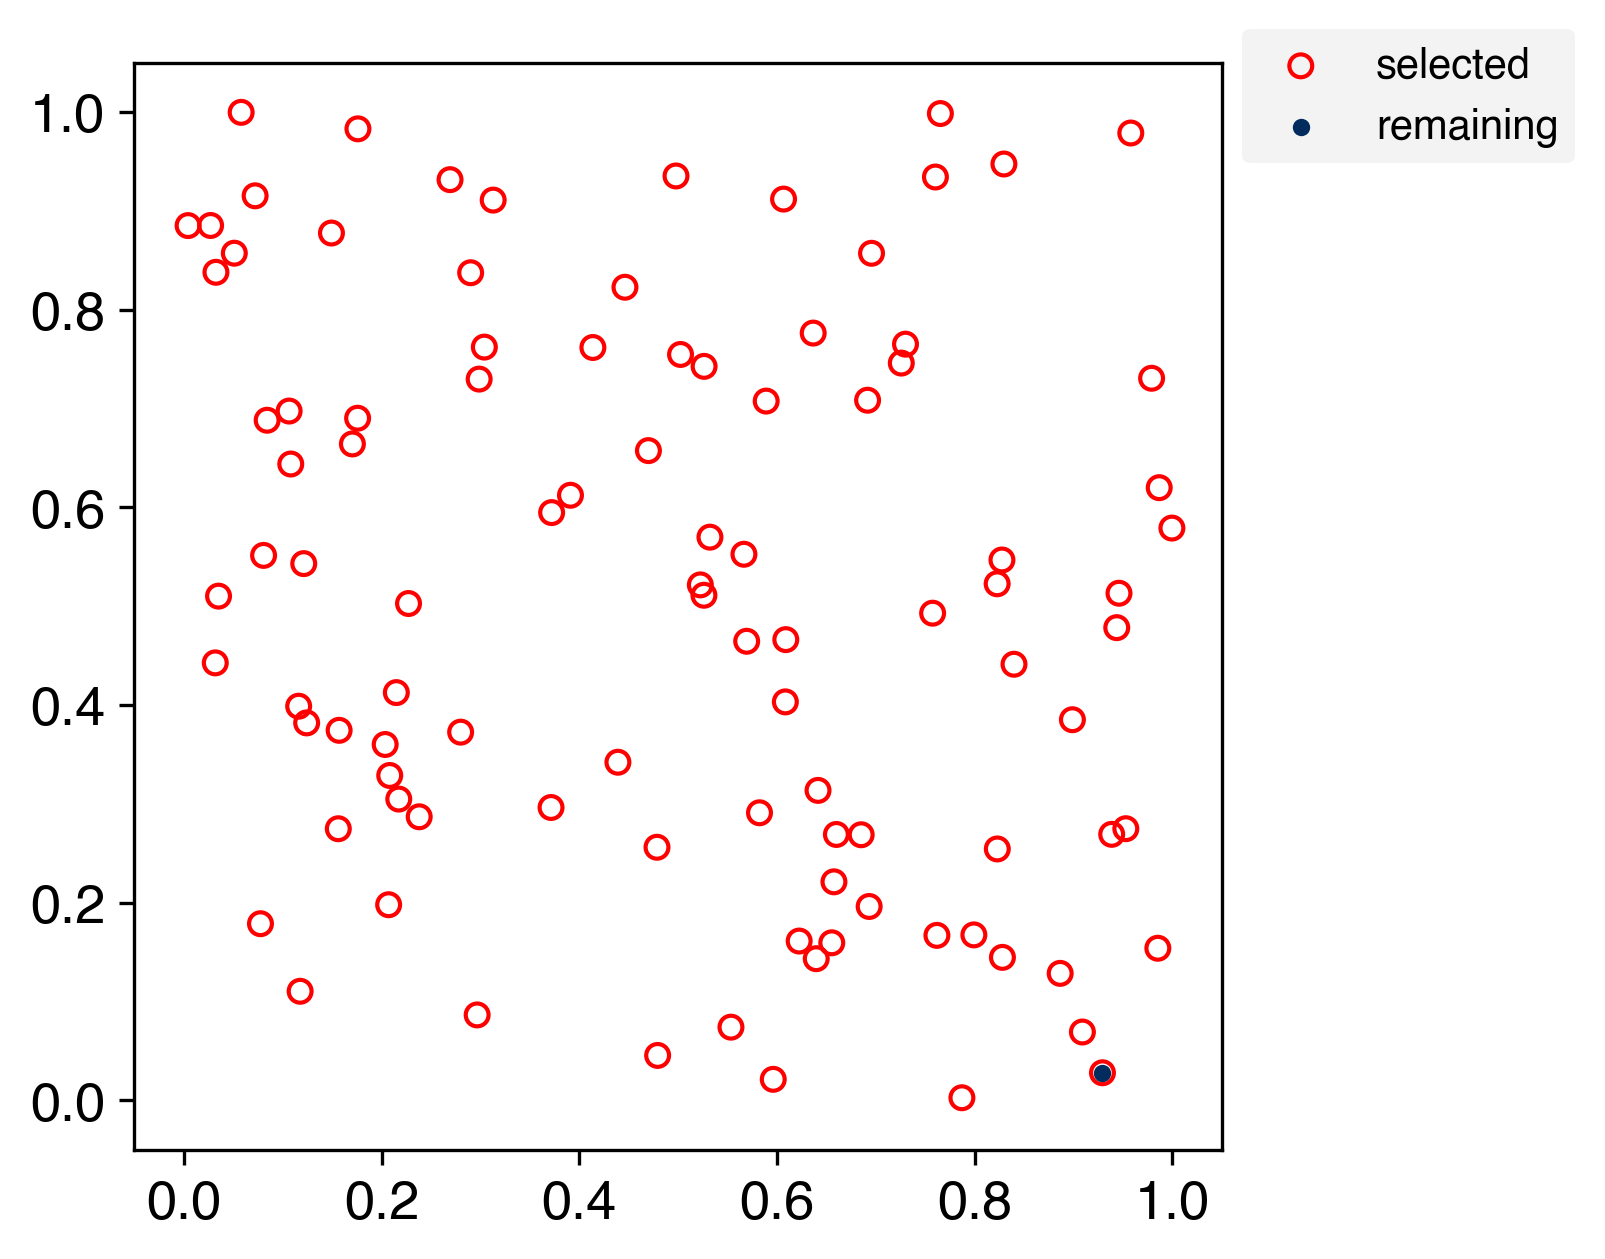

In [7]:
# generate figure
fig, ax = plt.subplots(figsize=(6.4, 4.8), facecolor="white", dpi=300)

# 最初の引数は'frame' (何コマ目か)で固定．それ以外の引数はfargsでtupleとして与える．
def scatter(
    frame: int, ax: matplotlib.axes.Axes, indexes: List[List[int]]
) -> None:
    # Clear all graphs except the first
    if frame > 0:
        plt.cla()

    colors_selected = ("red", "green")
    assert len(indexes) <= len(colors_selected)

    # scatter
    handles = []
    labels = []
    for i, index in enumerate(indexes):
        # selected
        _scatter = ax.scatter(
            *example[:, index[:frame]],
            s=30,
            facecolor="None",
            edgecolors=colors_selected[i],
        )
        handles.append(_scatter)
        labels.append(f"selected ({i})" if len(indexes) > 1 else "selected")

        # remaining
        _scatter = ax.scatter(*example[:, index[frame:]], s=10, c="#022c5e")
    else:
        handles.append(_scatter)
        labels.append("remaining")

    # set_lim
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)

    # set_aspect
    ax.set_aspect("equal", adjustable="box")

    # legend
    ax.legend(
        handles=handles,
        labels=labels,
        facecolor="#f0f0f0",
        edgecolor="None",
        fontsize=10,
        loc="upper left",
        bbox_to_anchor=(1, 1.05),
    )


# gif animation
ani = FuncAnimation(
    fig, scatter, interval=200, frames=len(indexes[0]), fargs=(ax, indexes)
)

# Save
ani.save("simulate.gif")


### Extended Kennard-stone (multi-class)

In [8]:
indexes = get_indexes(n_groups=2)


MovieWriter ffmpeg unavailable; using Pillow instead.


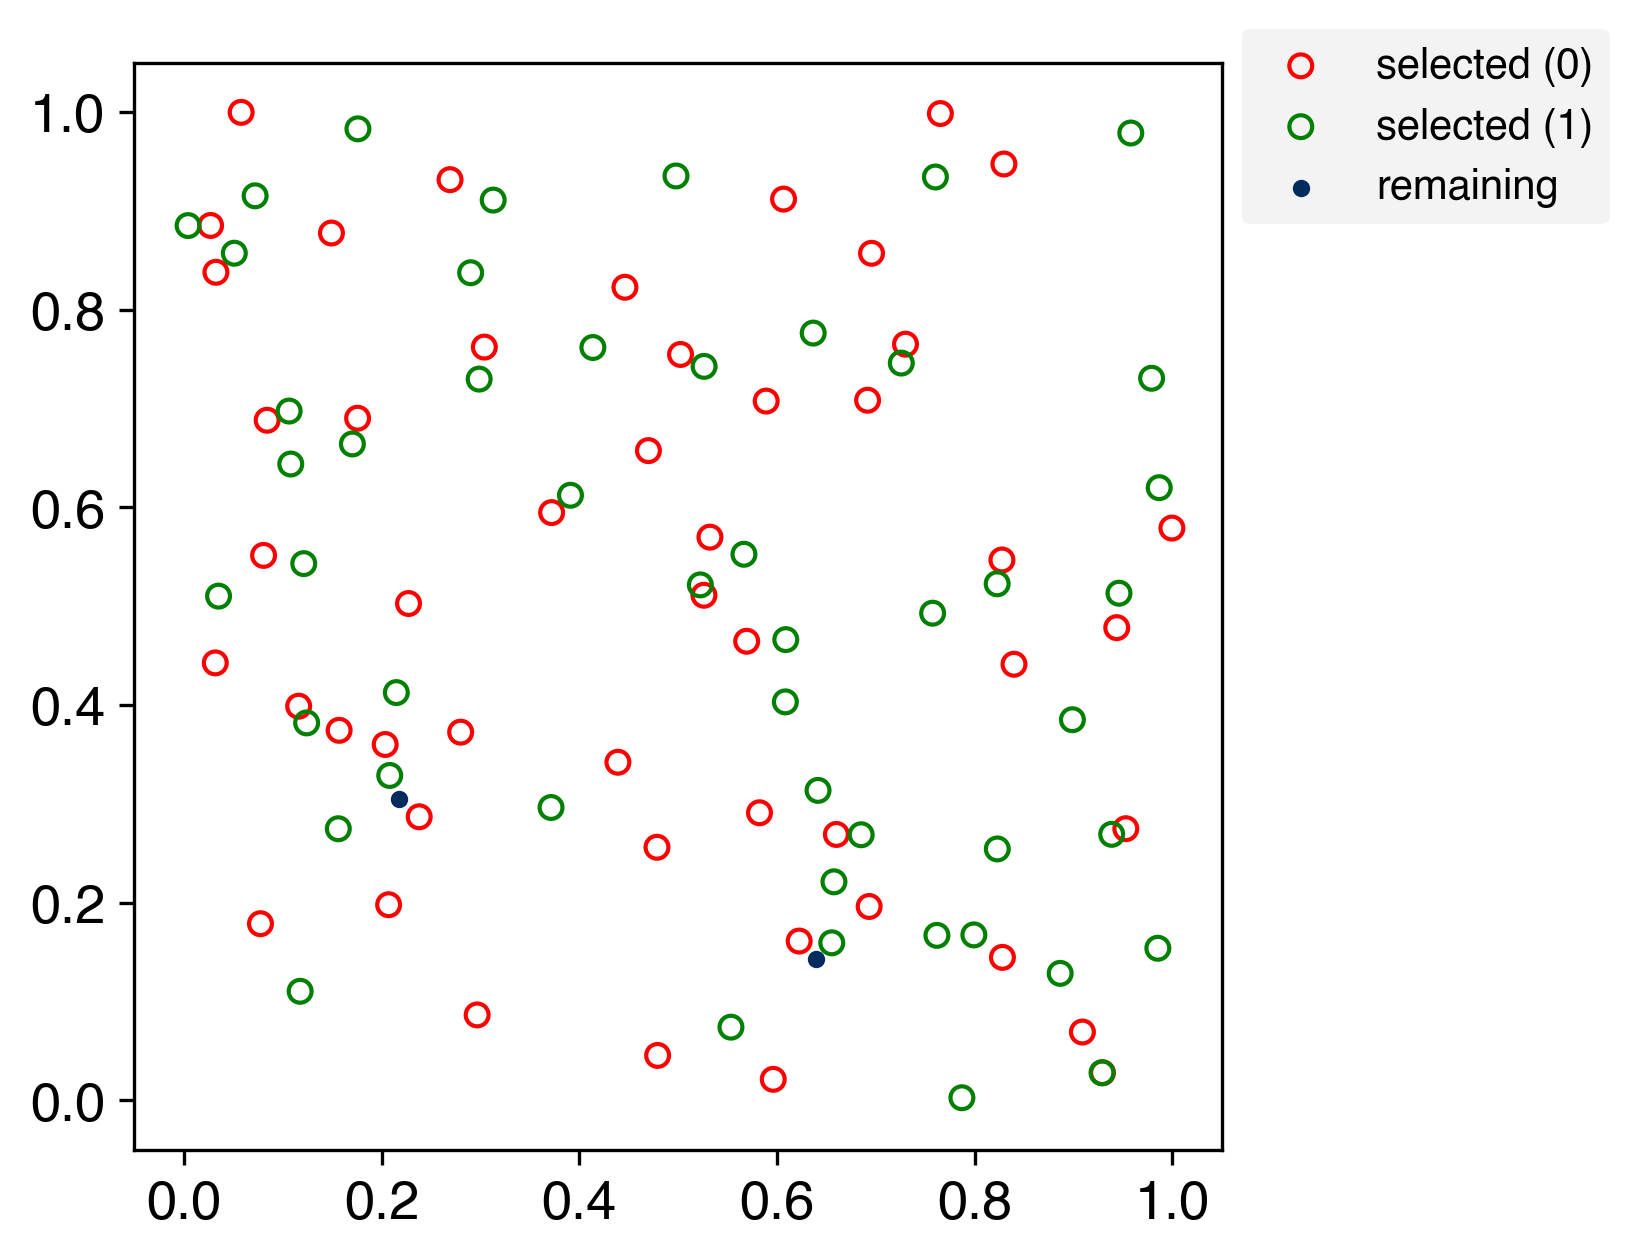

In [9]:
# generate figure
fig, ax = plt.subplots(figsize=(6.4, 4.8), facecolor="white", dpi=300)

# gif animation
ani = FuncAnimation(
    fig, scatter, interval=200, frames=len(indexes[0]), fargs=(ax, indexes)
)

# Save
ani.save("simulate_multi.gif")
